In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

In [ ]:
!unzip '/content/StreetNumbers.zip'

<class 'numpy.ndarray'>
(256, 256, 3)


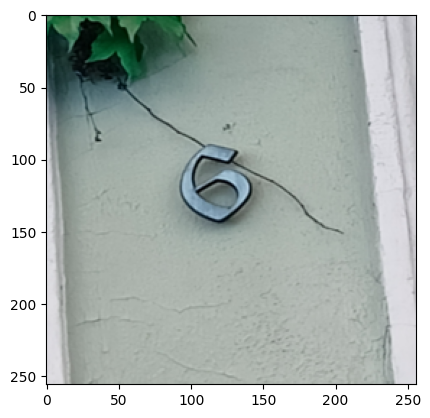

In [ ]:
import cv2
img = cv2.imread("/content/StreetNumbers/train/0037.png")
print(type(img))
print(img.shape)

imgplot = plt.imshow(img)

In [ ]:
x_train = []

# read training images and convert them into numpy array
for image_path in sorted(os.listdir("/content/StreetNumbers/train/")):
    image = plt.imread(os.path.join('/content/StreetNumbers/train/', image_path))
    # print(image)
    # print(type(image))
    print(image_path)
    x_train.append(image)

In [ ]:
# read labels of training data
train_labels = pd.read_csv('/content/StreetNumbers/labels_train.csv')
y_train = train_labels['Label']
print(train_labels['Label'].head())
print(train_labels['Label'][3])

0    1
1    3
2    3
3    5
4    7
Name: Label, dtype: int64
5


In [ ]:
x_test = []

# read testing images and convert them into numpy array
for image_path in sorted(os.listdir("/content/StreetNumbers/test/")):
    image = plt.imread(os.path.join('/content/StreetNumbers/test/', image_path))
    # print(image)
    # print(type(image))
    print(image_path)
    x_test.append(image)

In [ ]:
# convert list to numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)

In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(570, 256, 256, 3)
(570,)
(144, 256, 256, 3)


### One-hot Encoding

In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=10)

### Model Architecture

In [ ]:
# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the weights of the pre-trained layers
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# Create a new model
model = Sequential()

In [ ]:
# Add the VGG16 layers to the model
model.add(vgg16)

In [ ]:
# Add additional layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 23,106,122
Trainable params: 8,391,434
Non-trainable params: 14,714,688
_________________________________________________________________


### Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Data Augmentation

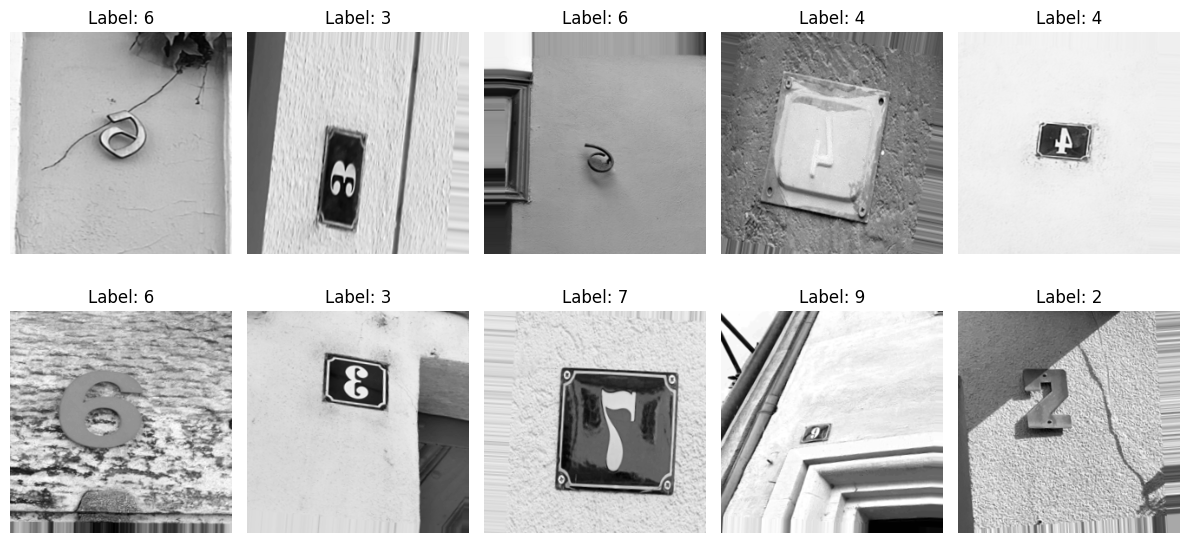

In [ ]:
# Reshape and normalize the images
x_train = x_train.reshape(-1, 256, 256, 3).astype('float32') / 255.0

# Create an instance of the ImageDataGenerator with desired augmentation options
data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the data generator on the training set
data_generator.fit(x_train)

# Generate augmented images
augmented_images = data_generator.flow(x_train, y_train, batch_size=1)

# Visualize a few augmented images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(2):
    for j in range(5):
        image, label = next(augmented_images)
        axs[i, j].imshow(image[0, :, :, 0], cmap='gray')
        axs[i, j].set_title(f"Label: {label[0]}")
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
data_gen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True
      )

In [ ]:
data_gen.fit(x_train)

### Model Training

In [ ]:
result = model.fit(
    data_gen.flow(x_train, y_train_encoded, batch_size=8),
    steps_per_epoch=len(x_train) // 8,
    epochs=5
)

Epoch 1/5
71/71 [==============================] - 462s 6s/step - loss: 3.4927 - accuracy: 0.1441
Epoch 2/5
71/71 [==============================] - 455s 6s/step - loss: 2.0794 - accuracy: 0.2544
Epoch 3/5
71/71 [==============================] - 455s 6s/step - loss: 1.9379 - accuracy: 0.3310
Epoch 4/5
71/71 [==============================] - 457s 6s/step - loss: 1.8449 - accuracy: 0.3203
Epoch 5/5
71/71 [==============================] - 458s 6s/step - loss: 1.7349 - accuracy: 0.4021


In [ ]:
result = model.fit(
  data_gen.flow(x_train, y_train_encoded, batch_size=16),
    steps_per_epoch=len(x_train) // 16,
    epochs=5
)

Epoch 1/5
35/35 [==============================] - 449s 13s/step - loss: 4.3385 - accuracy: 0.1408
Epoch 2/5
35/35 [==============================] - 444s 13s/step - loss: 2.3566 - accuracy: 0.2780
Epoch 3/5
35/35 [==============================] - 446s 13s/step - loss: 1.7924 - accuracy: 0.4025
Epoch 4/5
35/35 [==============================] - 449s 13s/step - loss: 1.6534 - accuracy: 0.4025
Epoch 5/5
35/35 [==============================] - 454s 13s/step - loss: 1.4584 - accuracy: 0.4804


In [ ]:
result = model.fit(
    data_gen.flow(x_train, y_train_encoded, batch_size=16),
    steps_per_epoch=len(x_train) // 16,
    epochs=10
)

Epoch 1/10
35/35 [==============================] - 445s 13s/step - loss: 3.8096 - accuracy: 0.1480
Epoch 2/10
35/35 [==============================] - 443s 13s/step - loss: 2.0470 - accuracy: 0.3357
Epoch 3/10
35/35 [==============================] - 441s 13s/step - loss: 1.7811 - accuracy: 0.3736
Epoch 4/10
35/35 [==============================] - 441s 13s/step - loss: 1.7420 - accuracy: 0.4332
Epoch 5/10
35/35 [==============================] - 451s 13s/step - loss: 1.4892 - accuracy: 0.4910
Epoch 6/10
35/35 [==============================] - 443s 13s/step - loss: 1.5002 - accuracy: 0.4874
Epoch 7/10
35/35 [==============================] - 442s 13s/step - loss: 1.4084 - accuracy: 0.5036
Epoch 8/10
35/35 [==============================] - 446s 13s/step - loss: 1.2426 - accuracy: 0.5704
Epoch 9/10
35/35 [==============================] - 445s 13s/step - loss: 1.2145 - accuracy: 0.5830
Epoch 10/10
35/35 [==============================] - 443s 13s/step - loss: 1.1531 - accuracy: 0.5903

1/1 [==============================] - 1s 1s/step
6


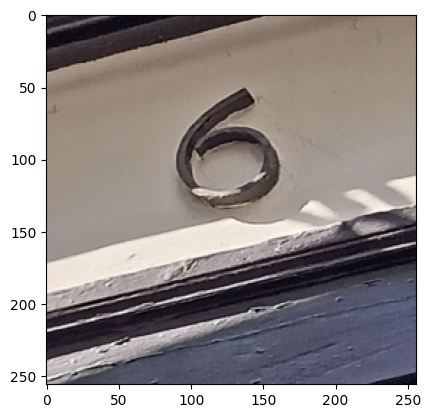

In [ ]:
image_index = 16
plt.imshow(x_test[image_index])
pred = model.predict(x_test[image_index].reshape(1, 256, 256, 3))
print(pred.argmax())

1/1 [==============================] - 1s 709ms/step
7


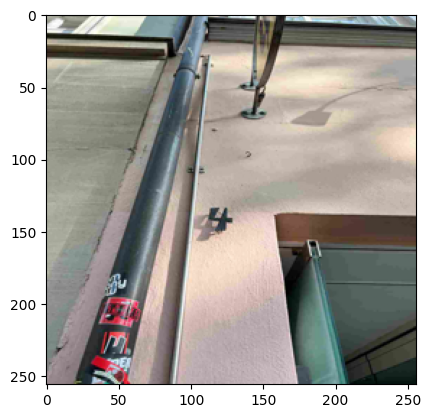

In [ ]:
image_index = 142
plt.imshow(x_test[image_index])
pred = model.predict(x_test[image_index].reshape(1, 256, 256, 3))
print(pred.argmax())

1/1 [==============================] - 1s 1s/step
5


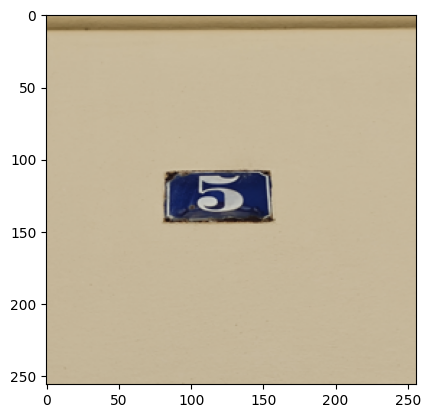

In [ ]:
image_index = 85
plt.imshow(x_test[image_index])
pred = model.predict(x_test[image_index].reshape(1, 256, 256, 3))
print(pred.argmax())

### Make predictions

In [ ]:
import pandas as pd

predictions = model.predict(x_test)
final_preds = []

for i in predictions:
  final_preds.append(np.argmax(i))

submission_df = pd.DataFrame({
    'Sample ID': '',
    'Prediction': final_preds
})

for i in range(len(x_test)):
  submission_df['Sample ID'][i] = "{:05d}".format(i)

submission_df.to_csv('submission.csv', index=False)

5/5 [==============================] - 113s 22s/step


<ipython-input-38-3998c356e765>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sample ID'][i] = "{:05d}".format(i)


### Model Accuracy & Loss

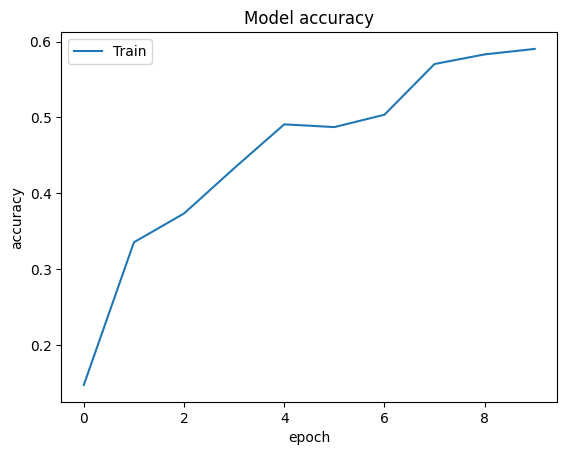

In [ ]:
plt.plot(result.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

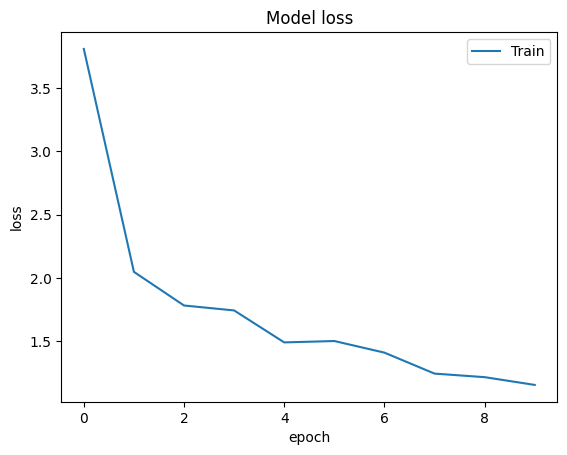

In [ ]:
plt.plot(result.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

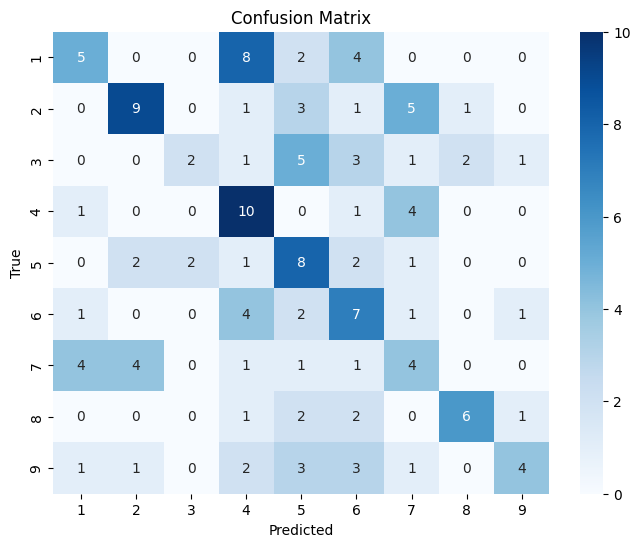

In [ ]:
# read labels of testing data
test_labels = pd.read_csv('/content/labels_test.csv')
y_test = test_labels['Label']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, final_preds)

# Get the class labels
classes = np.unique(y_test)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()